In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble  import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [21]:
df = pd.read_csv('mobile_prices_2023.csv')
df.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1836 non-null   object 
 1   Rating ?/5         1836 non-null   float64
 2   Number of Ratings  1836 non-null   object 
 3   RAM                1836 non-null   object 
 4   ROM/Storage        1662 non-null   object 
 5   Back/Rare Camera   1827 non-null   object 
 6   Front Camera       1435 non-null   object 
 7   Battery            1826 non-null   object 
 8   Processor          1781 non-null   object 
 9   Price in INR       1836 non-null   object 
 10  Date of Scraping   1836 non-null   object 
dtypes: float64(1), object(10)
memory usage: 157.9+ KB


In [23]:
df.isnull().sum()

Phone Name             0
Rating ?/5             0
Number of Ratings      0
RAM                    0
ROM/Storage          174
Back/Rare Camera       9
Front Camera         401
Battery               10
Processor             55
Price in INR           0
Date of Scraping       0
dtype: int64

In [24]:
df.shape

(1836, 11)

In [25]:
# to fill in missing values when the data is not numerical we use the 'Categorical_data' ik.e mode
categorical_data = df.select_dtypes(include=['object','category'])
for x in categorical_data:  
    df[x].fillna(df[x].mode()[0], inplace=True)
df.isnull().sum()                                          

Phone Name           0
Rating ?/5           0
Number of Ratings    0
RAM                  0
ROM/Storage          0
Back/Rare Camera     0
Front Camera         0
Battery              0
Processor            0
Price in INR         0
Date of Scraping     0
dtype: int64

In [26]:
df['Price in INR'] =df['Price in INR'].str.replace(',','')
df['Price in INR'] =df['Price in INR'].str.replace('₹','')
df['Number of Ratings'] = df['Number of Ratings'].str.replace(',','')
df['Price in INR'] = pd.to_numeric(df['Price in INR'])
df['Number of Ratings'] = pd.to_numeric(df['Number of Ratings'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1836 non-null   object 
 1   Rating ?/5         1836 non-null   float64
 2   Number of Ratings  1836 non-null   int64  
 3   RAM                1836 non-null   object 
 4   ROM/Storage        1836 non-null   object 
 5   Back/Rare Camera   1836 non-null   object 
 6   Front Camera       1836 non-null   object 
 7   Battery            1836 non-null   object 
 8   Processor          1836 non-null   object 
 9   Price in INR       1836 non-null   int64  
 10  Date of Scraping   1836 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 157.9+ KB


In [27]:
df.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,33561,2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5649,2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,77128,4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,11999,2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,15175,4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,6999,2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,22621,4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,7749,2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,15175,4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,6999,2023-06-17


In [28]:
encoder = LabelEncoder()
category = df.select_dtypes(include=['object','category'])
for x in category:
    df[x] = encoder.fit_transform(df[x])
df.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,746,4.2,33561,16,14,171,26,78,187,5649,0
1,789,4.2,77128,25,20,118,32,78,173,11999,0
2,748,4.3,15175,25,20,172,26,78,106,6999,0
3,750,4.2,22621,25,20,137,26,78,193,7749,0
4,747,4.3,15175,25,20,172,26,78,106,6999,0


In [29]:
X = df.drop(['Price in INR'], axis = 1)
Y = df['Price in INR']

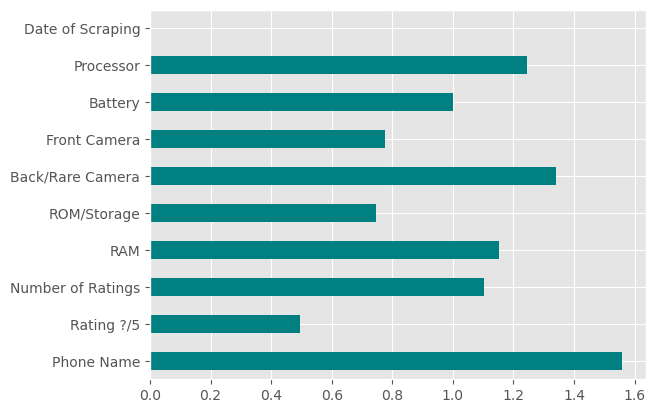

In [30]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
plt.style.use('ggplot')
importance = mutual_info_regression(X,Y)
feature_impor = pd.Series(importance,X.columns[0:len(X.columns)])
feature_impor.plot(kind = 'barh', color = 'teal')
plt.show()

In [31]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y, test_size=0.2, random_state=1)

In [32]:
tree = DecisionTreeRegressor()
tree.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [33]:
pred2 = tree.predict(xtest)
pred2

array([ 20999.        ,   1617.5       ,  16499.        ,  15990.        ,
        16999.        ,   6999.        ,  10499.        ,  11999.        ,
         8999.        ,  25999.        ,  36990.        ,  30990.        ,
        15499.        ,   9999.        ,  24990.        ,  16999.        ,
        14999.        ,  36999.        ,  25999.        ,  32299.        ,
        31999.        ,   7199.        ,  69999.        ,  13999.        ,
         1636.5       ,  11999.        ,  80999.        ,  49999.        ,
        48990.        ,  27999.        ,   9499.        ,   3440.        ,
         7499.        , 100999.        ,   5999.        ,  12999.        ,
        17499.        ,  27990.        ,   5999.        ,  13999.        ,
        71999.        ,  13499.        ,   8799.        ,  15499.        ,
         9490.        ,  23999.        ,  13999.        ,   1899.        ,
        14990.        ,  22800.        ,  13999.        ,  13999.        ,
        32990.        ,  

In [34]:
print('MAE', mean_absolute_error(ytest, pred2))
print('MAPE', mean_absolute_percentage_error(ytest, pred2))
print('MSE', mean_squared_error(ytest, pred2))
print('R2 SCORE', r2_score(ytest, pred2))

MAE 2143.238224637681
MAPE 0.25070020824592326
MSE 53362080.95093598
R2 SCORE 0.8925326918670112


In [35]:
outcome = {
    'Actual Price': ytest,
    'Predicted Price': pred2
}
df3 = pd.DataFrame(outcome)
df3

,Actual Price,Predicted Price
556,20999,20999.0
1386,1250,1617.5
1450,16499,16499.0
111,14999,15990.0
1787,15999,16999.0
...,...,...
790,13999,12988.0
846,10990,10990.0
654,13499,13499.0
1084,36600,46990.0


In [36]:
forest = RandomForestRegressor()
forest.fit(xtrain,ytrain)

RandomForestRegressor()

In [37]:
pred3 = forest.predict(xtest)
pred3

array([ 21885.85      ,   2413.295     ,  17393.64      ,  15649.68      ,
        16396.79      ,   7146.75      ,  10220.53      ,  12096.58      ,
         8856.15      ,  27232.66      ,  50931.47      ,  29262.69      ,
        15758.73      ,   9568.03      ,  29898.4       ,  16753.82      ,
        14560.2       ,  42298.02      ,  26180.34      ,  35633.89      ,
        28900.96833333,   7109.39      ,  70449.        ,  14008.92      ,
         1844.79928571,  10744.71      ,  80749.        ,  44321.14      ,
        43894.455     ,  27125.90833333,   9348.49      ,  15106.29690476,
        30573.37      , 101409.        ,   6745.29      ,  12932.66666667,
        18081.25      ,  28788.55      ,  18753.95      ,  13978.92      ,
        72079.        ,  13668.82      ,  10360.47      ,  15758.73      ,
        10656.11      ,  27383.62      ,  12913.13      ,   2248.14083333,
        15225.71      ,  22784.11      ,  14395.96      ,  13590.35      ,
        30578.66      ,  

<Axes: xlabel='Price in INR'>

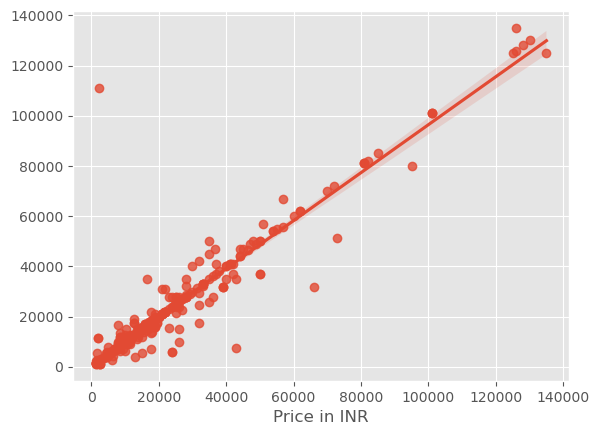

In [38]:
sns.regplot(x = ytest, y = pred2)